# Set Working directory

In [1]:
import os
os.chdir("E:\Python\Project_2")
os.getcwd()

'E:\\Python\\Project_2'

In [2]:
#Getting list of file in cwd
os.listdir()

['day.csv']

# importing dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_0 = pd.read_csv('day.csv')

In [5]:
df_0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_0.shape

(731, 16)

In [7]:
type(df_0)

pandas.core.frame.DataFrame

In [8]:
df_0.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
df_0.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [10]:
df_0.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#Creating a subset of continuous variables and categorical variables

In [11]:
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'cnt']

continuous_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

target_vars = ['casual', 'registered', 'cnt', 'temp']

# **Missing value Analysis**

In [12]:
df_0.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df_0.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**There are no missing value and null values in the dataset**

# Outlier Analysis

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

**Predictor variable**

Text(0.5,1,'Boxplot of predictor Continuous variables')

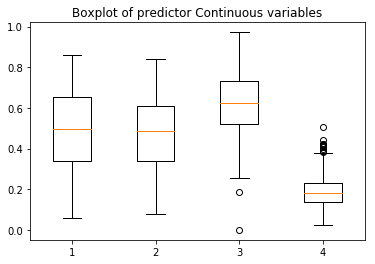

In [15]:
plt.boxplot([df_0['temp'], df_0['atemp'], df_0['hum'], df_0['windspeed']])
plt.title('Boxplot of predictor Continuous variables')

**Target Variable**

Text(0.5,1,'Boxplot of Target variable')

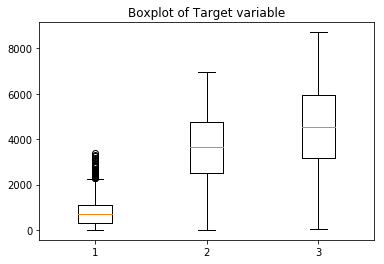

In [16]:
plt.boxplot([df_0['casual'], df_0['registered'], df_0['cnt']])
plt.title('Boxplot of Target variable')

**Analysis of continuous variables**

In [17]:
df_0.loc[:, ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**temp, atemp and humidity has no outlier. **

**windspeed has natural outlier in acceptable range**

**our tarhet variable casual has natural outlier.**
**Hence we won't remove any outlier**

# Univariate Analysis

**For Predictor Continuous variables**

In [18]:
import seaborn as sns
%matplotlib inline

C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


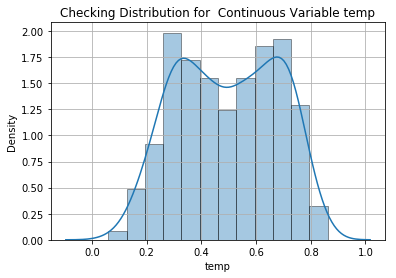

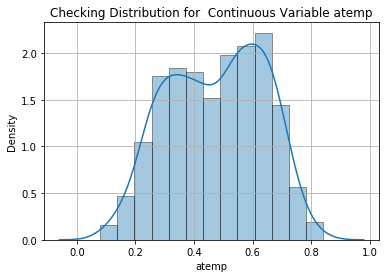

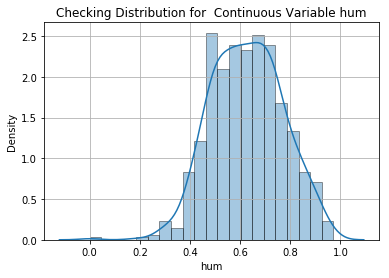

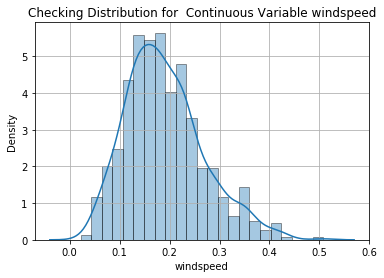

In [19]:
for i in continuous_vars:
    if i == 'cnt':
        continue
        rcParams['figure.figsize'] = 20, 10
    sns.distplot(df_0[i],bins = 'auto',hist_kws={'edgecolor': 'black'}).grid()
    plt.title("Checking Distribution for  Continuous Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

**For Target Variables **

C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


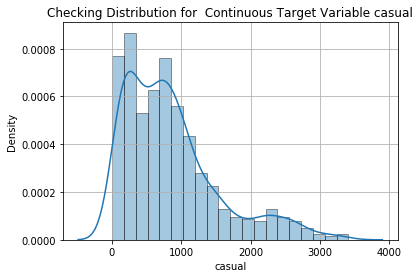

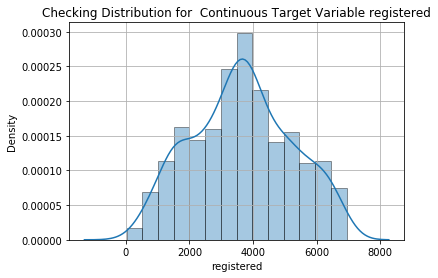

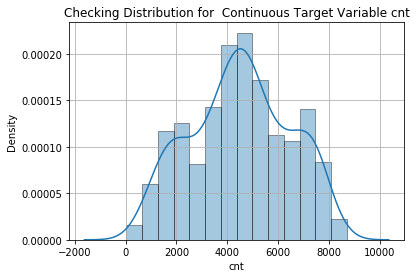

In [20]:
for i in target_vars:
    if i == 'temp':
        continue
        rcParams['figure.figsize'] = 20, 10
    sns.distplot(df_0[i],bins = 'auto',hist_kws={'edgecolor': 'black'}).grid()
    plt.title("Checking Distribution for  Continuous Target Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

**For Categorica Variables**

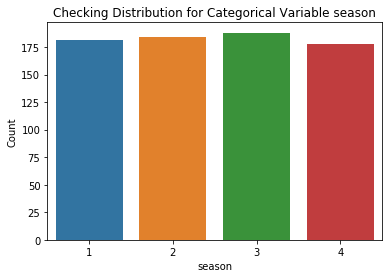

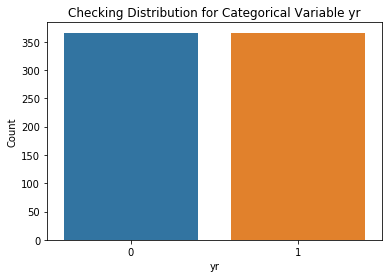

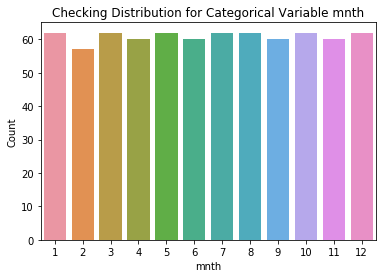

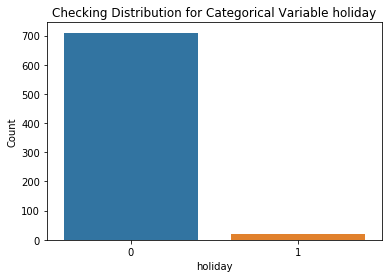

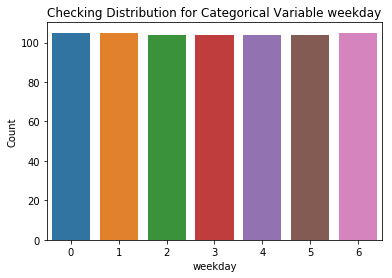

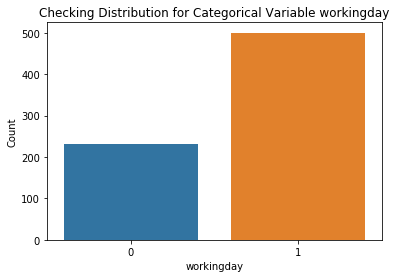

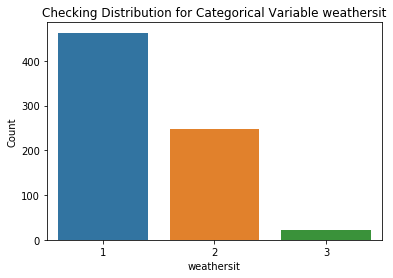

In [21]:
for i in categorical_vars:
    if i == 'cnt':
        continue
        rcParams['figure.figsize'] = 20, 10
    sns.countplot(df_0[i])
    plt.title("Checking Distribution for Categorical Variable "+str(i))
    plt.ylabel("Count")
    plt.show()

# **Bivariate Analysis**

**For Predictor continuous variables**

C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


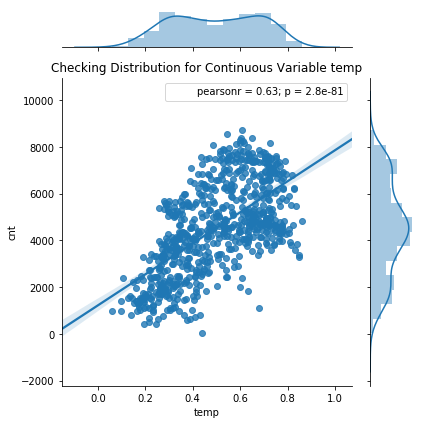

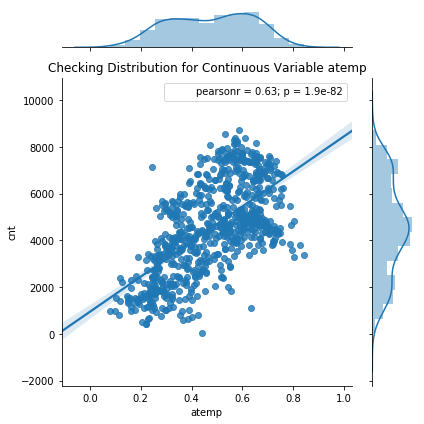

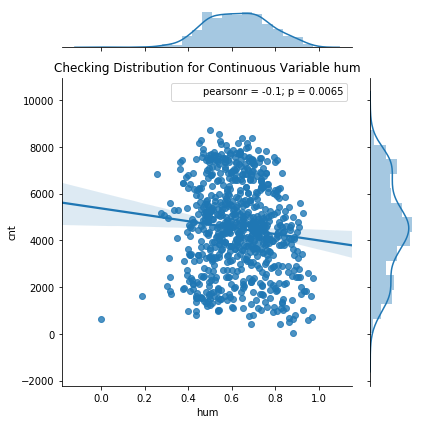

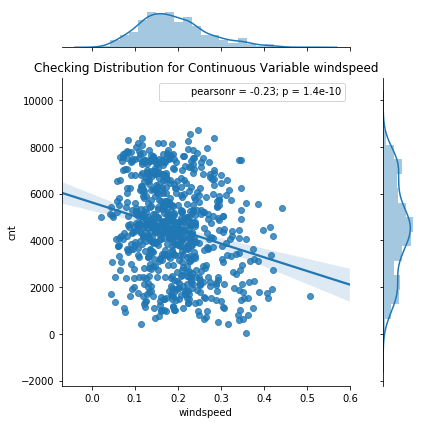

In [22]:
for i in continuous_vars:
    if i == 'cnt':
        continue
        rcParams['figure.figsize'] = 20, 10
    sns.jointplot(x=df_0[i],y='cnt',data=df_0,kind='reg')
    plt.title("Checking Distribution for Continuous Variable "+str(i))
    plt.ylabel('cnt')
    plt.tight_layout()
    plt.show()
    

**For Target variable casual and registered wrt total count**

C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


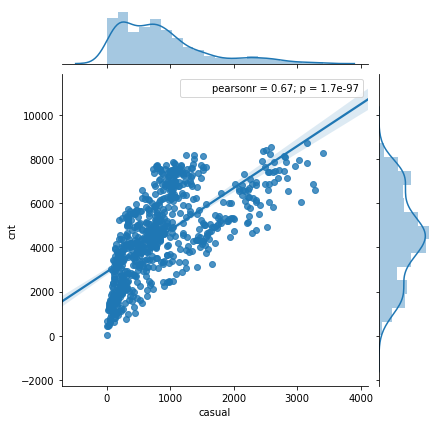

In [23]:
 sns.jointplot(x= 'casual', y='cnt',data=df_0,kind='reg')

C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


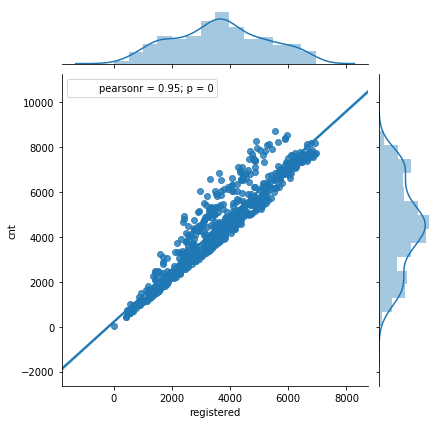

In [24]:
 sns.jointplot(x= 'registered',y='cnt',data=df_0,kind='reg')

**For Categorical Variables**

Text(0,0.5,'count')

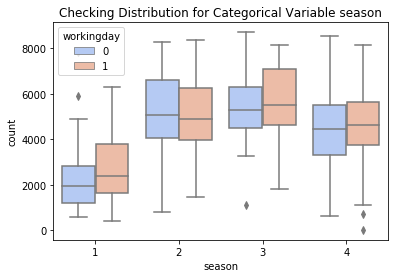

In [25]:
#Season vs Count
sns.boxplot(x="season", y="cnt", hue="workingday",data=df_0, palette="coolwarm")
plt.title("Checking Distribution for Categorical Variable season")
plt.ylabel('count')

Text(0,0.5,'count')

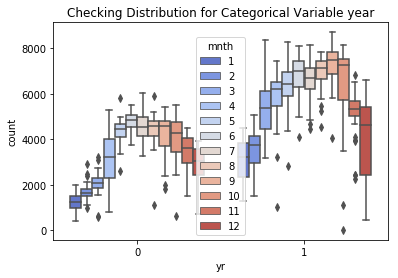

In [26]:
#year vs Count
sns.boxplot(x="yr", y="cnt", hue="mnth",data=df_0, palette="coolwarm")
plt.title("Checking Distribution for Categorical Variable year")
plt.ylabel('count')

Text(0,0.5,'count')

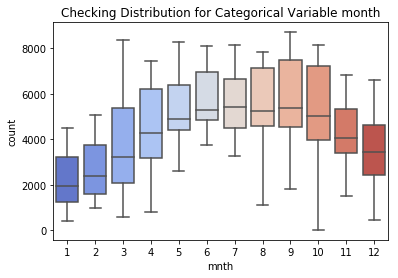

In [27]:
#month vs Count
sns.boxplot(x="mnth", y="cnt", data=df_0, palette="coolwarm")
plt.title("Checking Distribution for Categorical Variable month")
plt.ylabel('count')

Text(0,0.5,'count')

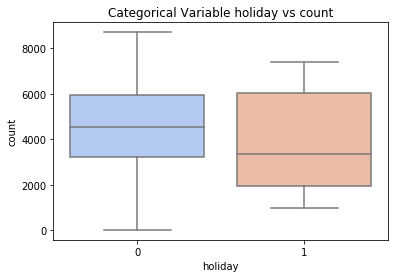

In [28]:
#holiday vs Count
sns.boxplot(x="holiday", y="cnt", data=df_0, palette="coolwarm")
plt.title("Categorical Variable holiday vs count")
plt.ylabel('count')

Text(0,0.5,'count')

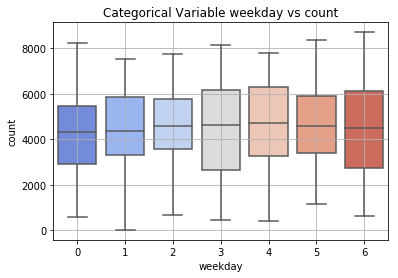

In [29]:
#weekday vs Count
sns.boxplot(x="weekday", y="cnt",data=df_0, palette="coolwarm").grid()
plt.title("Categorical Variable weekday vs count")
plt.ylabel('count')

Text(0,0.5,'count')

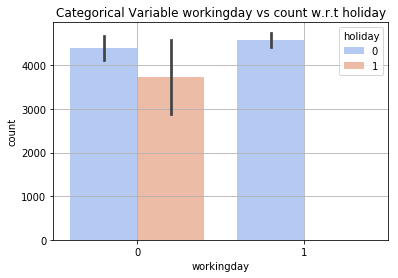

In [30]:
#workingday vs Count
sns.barplot(x="workingday", y="cnt",hue = 'holiday',data=df_0, palette="coolwarm").grid()
plt.title("Categorical Variable workingday vs count w.r.t holiday")
plt.ylabel('count')

Text(0,0.5,'count')

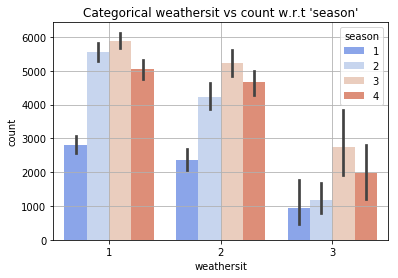

In [31]:
#weathersit vs Count
sns.barplot(x="weathersit", y="cnt",hue = 'season',data=df_0, palette="coolwarm").grid()
plt.title("Categorical weathersit vs count w.r.t 'season'")
plt.ylabel('count')

# Feature Selection

**Co-relation between continuous variables **

In [32]:
df_0.loc[:, ('temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt')].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


[]

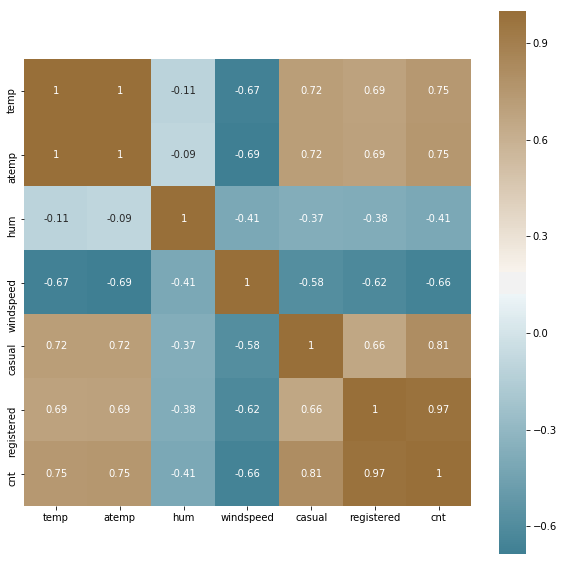

In [33]:
df_0_corr = df_0.loc[:, ('temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt')].corr()

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
df_corr = df_0_corr.corr()

#Plot using seaborn library
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

**Here temp and atemp are strongly correlated hence we will drop one variable 'atemp' from our dataset**

**Also we are removing 'instant' and 'dteday' as they will not be helpful for our analysis**

# Creating copy of dataset

In [34]:
day_data = df_0.copy()

In [35]:
day_data.drop(['atemp', 'instant', 'dteday'], axis = 1, inplace=True)

In [36]:
day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


# Feature Scaling

**All our predictor variables are already in scaled version so we wont be applying scaling in this dataset**

# Model Development

**In this section we will develope one model each for Casual, registered and count variables taking one at a time as target variable**

In [37]:
day_data.shape

(731, 13)

**Creating Dummy Variable**

In [38]:
df_dummies = pd.get_dummies(data = day_data, columns = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 
                                                        'weathersit'])

In [39]:
df_dummies.head()

,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,331,654,985,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.696087,0.248539,131,670,801,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.437273,0.248309,120,1229,1349,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.590435,0.160296,108,1454,1562,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.436957,0.186900,82,1518,1600,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [40]:
df_dummies.shape

(731, 38)

# 1. Model for Total Count of bike rental i.e. 'cnt'

**Splitting data into Tarin and Test**

In [41]:
bike_count = df_dummies.copy()

In [42]:
bike_count.head()

,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,331,654,985,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.696087,0.248539,131,670,801,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.437273,0.248309,120,1229,1349,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.590435,0.160296,108,1454,1562,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.436957,0.186900,82,1518,1600,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [43]:
from sklearn.model_selection import train_test_split
X = bike_count.drop(['casual', 'registered'], axis = 1)
y = bike_count.loc[:,['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [44]:
print(df_dummies.shape, X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(731, 38) (731, 36) (731, 1) (584, 36) (584, 1) (147, 36) (147, 1)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

C:\Users\samee\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 1.1 Linear Regression

In [46]:
lm_count = LinearRegression()
lm_count.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Prediction from our Model**

In [47]:
lm_prediction_count = lm_count.predict(X_test)

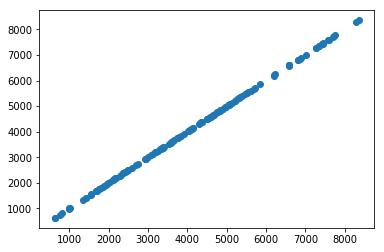

In [48]:
plt.scatter(y_test, lm_prediction_count)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [49]:
from sklearn import metrics

In [50]:
print('MAE:',metrics.mean_absolute_error(y_test, lm_prediction_count))
print('MSE:', metrics.mean_squared_error(y_test, lm_prediction_count))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_prediction_count)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lm_prediction_count)))

MAE: 1.7694930932452889e-12
MSE: 4.6008404648889066e-24
RMSE: 2.1449569843912736e-12
R^2 Score(coefficient of determination) = 1.0


# 1.2 Decision Tree

In [51]:
dtree_count = DecisionTreeRegressor()

In [52]:
dtree_count.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

**Prediction from our Model**

In [53]:
dtree_prediction_count = dtree_count.predict(X_test)

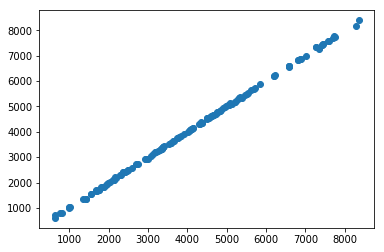

In [54]:
plt.scatter(y_test, dtree_prediction_count)

In [55]:
print('MAE:',metrics.mean_absolute_error(y_test, dtree_prediction_count))
print('MSE:', metrics.mean_squared_error(y_test, dtree_prediction_count))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtree_prediction_count)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dtree_prediction_count)))

MAE: 17.693877551020407
MSE: 655.0680272108843
RMSE: 25.59429677117315
R^2 Score(coefficient of determination) = 0.9998227418340407


# 1.3 Random Forest

In [56]:
RF_count = RandomForestRegressor(n_estimators=100)

In [57]:
RF_count.fit(X_train, y_train)

C:\Users\samee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

**Prediction from our Model**

In [58]:
RF_predict_count = RF_count.predict(X_test)

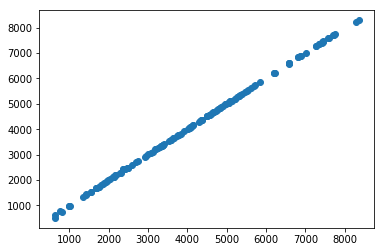

In [59]:
plt.scatter(y_test, RF_predict_count)

In [60]:
print('MAE:',metrics.mean_absolute_error(y_test, RF_predict_count))
print('MSE:', metrics.mean_squared_error(y_test, RF_predict_count))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_predict_count)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, RF_predict_count)))

MAE: 10.55142857142858
MSE: 355.90169251700763
RMSE: 18.865356941150296
R^2 Score(coefficient of determination) = 0.9999036947635104


# 1.4 XGBoost

In [61]:
xgb_count = XGBRegressor()

In [62]:
xgb_count.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

**Prediction from our Model**

In [63]:
xgb_predict_cout = xgb_count.predict(X_test)

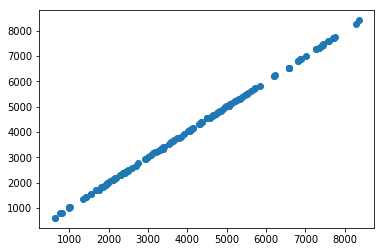

In [64]:
plt.scatter(y_test, xgb_predict_cout)

In [65]:
print('MAE:',metrics.mean_absolute_error(y_test, xgb_predict_cout))
print('MSE:', metrics.mean_squared_error(y_test, xgb_predict_cout))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_predict_cout)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, xgb_predict_cout)))

MAE: 17.215979751275512
MSE: 505.88024082490983
RMSE: 22.491781628517334
R^2 Score(coefficient of determination) = 0.9998631113106444


# 2. Model for Registered user Count of bike rental i.e. 'registered'

In [66]:
bike_registered = df_dummies.copy()

In [67]:
bike_registered.head(5)

,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,331,654,985,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.696087,0.248539,131,670,801,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.437273,0.248309,120,1229,1349,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.590435,0.160296,108,1454,1562,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.436957,0.186900,82,1518,1600,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [68]:
X = bike_registered.drop(['casual', 'cnt'], axis = 1)
y = bike_registered.loc[:,['registered']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [69]:
print(df_dummies.shape, X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(731, 38) (731, 36) (731, 1) (584, 36) (584, 1) (147, 36) (147, 1)


# 2.1 Linear Regression

In [70]:
lm_reg = LinearRegression()
lm_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Prediction From our Model**

In [71]:
lm_predict_reg = lm_reg.predict(X_test)

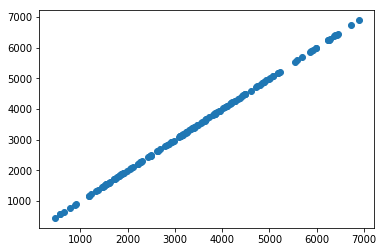

In [72]:
plt.scatter(y_test, lm_predict_reg)

In [73]:
print('MAE:',metrics.mean_absolute_error(y_test, lm_predict_reg))
print('MSE:', metrics.mean_squared_error(y_test, lm_predict_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predict_reg)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lm_predict_reg)))

MAE: 4.794955060367479e-13
MSE: 4.804118693654063e-25
RMSE: 6.931175004033633e-13
R^2 Score(coefficient of determination) = 1.0


# 2.2 Decision Tree

In [74]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

**Prediction from our Model**

In [75]:
dtree_pred_reg = dtree_reg.predict(X_test)

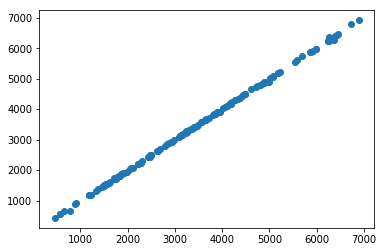

In [76]:
plt.scatter(y_test, dtree_pred_reg)

In [77]:
print('MAE:',metrics.mean_absolute_error(y_test, dtree_pred_reg))
print('MSE:', metrics.mean_squared_error(y_test, dtree_pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtree_pred_reg)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dtree_pred_reg)))

MAE: 13.70748299319728
MSE: 484.3333333333333
RMSE: 22.00757445365875
R^2 Score(coefficient of determination) = 0.999804898768761


# 2.3 Random Forest

In [78]:
RF_reg = RandomForestRegressor(n_estimators=100)
RF_reg.fit(X_train, y_train)

C:\Users\samee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

**Prediction from our Model**

In [79]:
RF_pred_reg = RF_reg.predict(X_test)

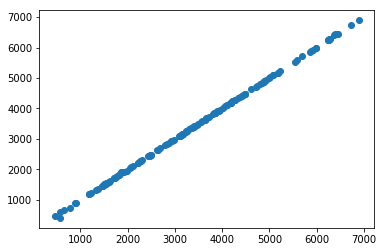

In [80]:
plt.scatter(y_test, RF_pred_reg)

In [81]:
print('MAE:',metrics.mean_absolute_error(y_test, RF_pred_reg))
print('MSE:', metrics.mean_squared_error(y_test, RF_pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_pred_reg)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, RF_pred_reg)))

MAE: 8.41619047619049
MSE: 300.1420054421772
RMSE: 17.32460693470929
R^2 Score(coefficient of determination) = 0.9998790955096869


# 2.4 XGBoost

In [82]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

**Prediction from our Model**

In [83]:
xgb_pred_reg = xgb_reg.predict(X_test)

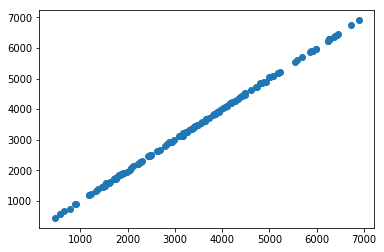

In [84]:
plt.scatter(y_test, xgb_pred_reg)

In [85]:
print('MAE:',metrics.mean_absolute_error(y_test, xgb_pred_reg))
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred_reg)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, xgb_pred_reg)))

MAE: 12.69740139708227
MSE: 278.7757125104315
RMSE: 16.69657786824688
R^2 Score(coefficient of determination) = 0.9998877023714722


# 3. Model for Casual user Count of bike rental i.e. 'casual'

In [86]:
bike_casual = df_dummies.copy()

In [87]:
bike_casual.head(5)

,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,331,654,985,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.696087,0.248539,131,670,801,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.437273,0.248309,120,1229,1349,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.590435,0.160296,108,1454,1562,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.436957,0.186900,82,1518,1600,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [88]:
X = bike_casual.drop(['registered', 'cnt'], axis = 1)
y = bike_casual.loc[:,['casual']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [89]:
print(df_dummies.shape, X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(731, 38) (731, 36) (731, 1) (584, 36) (584, 1) (147, 36) (147, 1)


# 3.1 Linear Regression

In [90]:
lm_casual = LinearRegression()
lm_casual.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Prediction from our Model**

In [91]:
lm_pred_casual = lm_casual.predict(X_test)

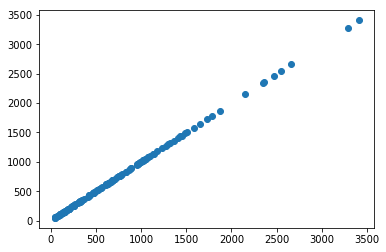

In [92]:
plt.scatter(y_test, lm_pred_casual)

In [93]:
print('MAE:',metrics.mean_absolute_error(y_test, lm_pred_casual))
print('MSE:', metrics.mean_squared_error(y_test, lm_pred_casual))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_pred_casual)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lm_pred_casual)))

MAE: 2.4429135962799634e-13
MSE: 9.95818510041737e-26
RMSE: 3.155659218042622e-13
R^2 Score(coefficient of determination) = 1.0


# 3.2 Decision Tree

In [94]:
dtree_casual = DecisionTreeRegressor()
dtree_casual.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

**Prediction from our Model**

In [95]:
dtree_pred_casual = dtree_casual.predict(X_test)

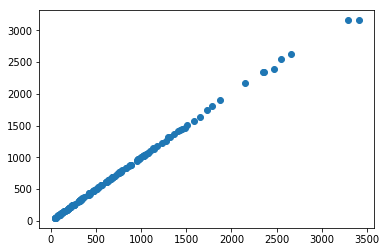

In [96]:
plt.scatter(y_test, dtree_pred_casual)

In [97]:
print('MAE:',metrics.mean_absolute_error(y_test, dtree_pred_casual))
print('MSE:', metrics.mean_squared_error(y_test, dtree_pred_casual))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtree_pred_casual)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dtree_pred_casual)))

MAE: 7.149659863945578
MSE: 608.3333333333334
RMSE: 24.664414311581236
R^2 Score(coefficient of determination) = 0.9985103409843802


# 3.3 Random Forest

In [98]:
RF_casual = RandomForestRegressor(n_estimators=100)
RF_casual.fit(X_train, y_train)

C:\Users\samee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

**Prediction from our Model**

In [99]:
RF_pred_casual = RF_casual.predict(X_test)

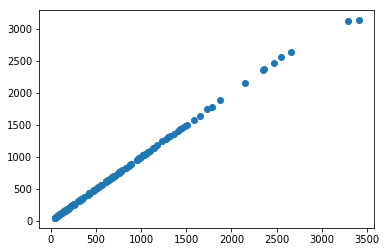

In [100]:
plt.scatter(y_test, RF_pred_casual)

In [101]:
print('MAE:',metrics.mean_absolute_error(y_test, RF_pred_casual))
print('MSE:', metrics.mean_squared_error(y_test, RF_pred_casual))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_pred_casual)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, RF_pred_casual)))

MAE: 5.2938095238095215
MSE: 699.5675734693868
RMSE: 26.449339754885884
R^2 Score(coefficient of determination) = 0.9982869307240757


# 3.4 XGBoost

In [102]:
xgb_casual = XGBRegressor()
xgb_casual.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

**Prediction from our model**

In [103]:
xgb_pred_casual = xgb_casual.predict(X_test)

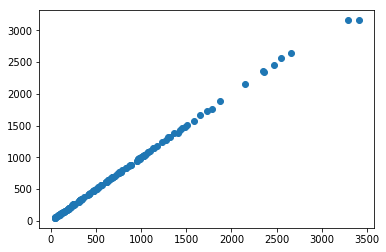

In [104]:
plt.scatter(y_test, xgb_pred_casual)

In [105]:
print('MAE:',metrics.mean_absolute_error(y_test, xgb_pred_casual))
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred_casual))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred_casual)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, xgb_pred_casual)))

MAE: 6.8617345848862
MSE: 564.3442055643096
RMSE: 23.755929903169644
R^2 Score(coefficient of determination) = 0.998618059560989
